<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto de Parceria** | Falta de Igualdade na Educação pelo Mundo
Aluna: [Maria Luiza Cordeiro](https://www.linkedin.com/in/malu-analise-de-dados/)

---

# **Tópicos**

<ol type="1">
  <li>Contexto;</li>
  <li>Manipulação;</li>
  <li>Visualização;</li>
</ol>

---

## Contexto

A educação é algo imprescindível para o desenvolvimento humano, porém, mesmo com essa importância, muitas regiões do mundo enfrentam problemas para garantir uma igualdade no acesso ao ensino.

Nesse projeto, foi utilizada a base de dados [Inequality in Education Around the World](https://www.kaggle.com/datasets/iamsouravbanerjee/inequality-in-education-around-the-world), disponível no Kaggle. Nela, encontra-se o nível de desigualdade na educação entre os anos de 2010 e 2021 por país, bem como o seu Índice de Desenvolvimento Humano (IDH) em 2021 e outras informações relacionadas ao desenvolvimento dos países no mundo.

In [1]:
!wget -q "https://raw.githubusercontent.com/malucor/educacao/main/Inequality%20in%20Education.csv?token=GHSAT0AAAAAACGZ2LF4NW6WIKITFMD5V4SKZHSQFKQ" -O education.csv

Essa atividade terá como foco a relação do rank do IDH com a evolução do índice relacionado a falta de igualdade da educação por ano.

## Manipulação

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns

Para começar, é necessário tratar os dados no arquivo original, que está no formato `.csv`.

In [39]:
# Conversão do arquivo de .csv para DataFrame

education_df = pd.read_csv('education.csv')
education_df.head()

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,AFG,Afghanistan,Low,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,ALB,Albania,High,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,AND,Andorra,Very High,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,ARE,United Arab Emirates,Very High,AS,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [40]:
# Remoção das colunas que não são o foco do projeto

education = education_df.drop(columns=['ISO3', 'Country', 'Human Development Groups', 'UNDP Developing Regions'])
education.head()

,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


### Dados Faltantes

In [41]:
# Verificar se há valores nulos

print(education.isna().sum())

HDI Rank (2021)                    4
Inequality in Education (2010)    58
Inequality in Education (2011)    45
Inequality in Education (2012)    38
Inequality in Education (2013)    30
Inequality in Education (2014)    27
Inequality in Education (2015)    27
Inequality in Education (2016)    27
Inequality in Education (2017)    27
Inequality in Education (2018)    23
Inequality in Education (2019)    21
Inequality in Education (2020)    19
Inequality in Education (2021)    19
dtype: int64


Como há valores nulos, eles serão divididos em duas categorias:
- Os que impedem de continuar com o Aprendizado de Máquina; nesse caso, toda a linha de dados será descartada (o IDH na base de dados que está sendo trabalhada)
- Os que se pode inferir a partir de outros dados; nesse caso, será feita a média dos dados relacionados (os índices de desigualdade na base de dados que está sendo trabalhada)

In [42]:
# Retirar os valores nulos da coluna de IDH

education_clean_df = education.dropna(subset=['HDI Rank (2021)'])
education_clean_df.head()

,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,148.0,NaN,NaN,NaN,NaN,NaN,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [43]:
print(education_clean_df.isna().sum())

HDI Rank (2021)                    0
Inequality in Education (2010)    55
Inequality in Education (2011)    42
Inequality in Education (2012)    34
Inequality in Education (2013)    26
Inequality in Education (2014)    23
Inequality in Education (2015)    23
Inequality in Education (2016)    23
Inequality in Education (2017)    23
Inequality in Education (2018)    19
Inequality in Education (2019)    17
Inequality in Education (2020)    15
Inequality in Education (2021)    15
dtype: int64


In [45]:
# Criar um dataframe que só tenha as linhas com valores nulos

colunas_valores_nulos = education_clean_df.drop(columns=['HDI Rank (2021)'])
valores_nulos = colunas_valores_nulos.isna().any(axis=1)

valores_nulos = colunas_valores_nulos[valores_nulos]
valores_nulos.head()

,Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
1,NaN,NaN,NaN,NaN,NaN,34.17144,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
4,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,44.79226,44.79226,44.79226,43.65639,43.65639,43.656390,43.693550,43.693550,43.693550,43.693550,43.693550
20,NaN,NaN,3.67781,3.67781,3.67781,3.67781,3.677810,3.677810,3.677810,2.772030,2.772030,2.772030


In [46]:
# Transformar as linhas em colunas

valores_nulos_transposed = valores_nulos.transpose()
valores_nulos_transposed.head()

,1,4,7,13,20,21,24,25,30,34,...,173,175,176,177,179,185,186,189,190,192
Inequality in Education (2010),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.24207,NaN,NaN,NaN,10.499,NaN,NaN,17.49305,NaN,NaN
Inequality in Education (2011),NaN,NaN,NaN,44.79226,NaN,15.85449,NaN,NaN,NaN,33.66053,...,5.24207,5.061194,9.71398,NaN,10.499,NaN,NaN,17.49305,NaN,NaN
Inequality in Education (2012),NaN,NaN,NaN,44.79226,3.67781,15.85449,5.54685,NaN,NaN,33.66053,...,NaN,5.061194,9.71398,34.57692,10.499,NaN,NaN,17.49305,NaN,16.06077
Inequality in Education (2013),NaN,NaN,NaN,44.79226,3.67781,15.85449,5.54685,NaN,2.34809,33.66053,...,NaN,5.061194,9.71398,34.57692,10.499,0.779397,NaN,17.49305,NaN,16.06077
Inequality in Education (2014),NaN,NaN,NaN,43.65639,3.67781,15.85449,5.54685,NaN,2.37852,32.95967,...,NaN,5.061194,9.71398,34.57692,10.499,0.765510,NaN,17.49305,NaN,16.06077


In [47]:
# Fazer a média de cada coluna

valores_nulos_transposed_mean = valores_nulos_transposed.agg('mean')
valores_nulos_transposed_mean = pd.DataFrame([valores_nulos_transposed_mean], columns=valores_nulos_transposed.columns)
valores_nulos_transposed_mean.head()

,1,4,7,13,20,21,24,25,30,34,...,173,175,176,177,179,185,186,189,190,192
0,34.17144,13.875699,NaN,43.983064,3.406076,15.191584,5.54685,NaN,2.07139,32.69893,...,3.747624,4.810606,9.71398,33.027292,10.16849,0.661381,9.166052,17.49305,7.02996,16.621268


In [48]:
# Transformar as colunas em linhas

valores_nulos_mean = valores_nulos_transposed_mean.transpose()
valores_nulos_mean.head()

,0
1,34.171440
4,13.875699
7,NaN
13,43.983064
20,3.406076


In [50]:
# Adicionar a coluna de média ao dataframe com os valores nulos

valores_nulos['Mean'] = valores_nulos_mean
valores_nulos = valores_nulos.dropna(subset=['Mean'])

valores_nulos.head()

,Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021),Mean
1,NaN,NaN,NaN,NaN,NaN,34.17144,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
4,NaN,NaN,NaN,NaN,NaN,NaN,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355,13.875699
13,NaN,44.79226,44.79226,44.79226,43.65639,43.65639,43.656390,43.693550,43.693550,43.693550,43.693550,43.693550,43.983064
20,NaN,NaN,3.67781,3.67781,3.67781,3.67781,3.677810,3.677810,3.677810,2.772030,2.772030,2.772030,3.406076
21,NaN,15.85449,15.85449,15.85449,15.85449,14.81278,14.812780,14.812780,14.812780,14.812780,14.812780,14.812780,15.191584


In [51]:
# Juntar o dataframe que tem os valores nulos, com o que tem a média e depois remover os dados nulos e desnecessário

education_merged = education_clean_df.merge(valores_nulos, how='left', left_index=True, right_index=True)

education_final = education_merged.apply(lambda coluna: coluna.fillna(coluna['Mean']), axis=1)
education_final = education_final.drop(columns=['Inequality in Education (2010)_y', 'Inequality in Education (2011)_y', 'Inequality in Education (2012)_y', 'Inequality in Education (2013)_y', 'Inequality in Education (2014)_y', 'Inequality in Education (2015)_y', 'Inequality in Education (2016)_y', 'Inequality in Education (2017)_y', 'Inequality in Education (2018)_y', 'Inequality in Education (2019)_y', 'Inequality in Education (2020)_y', 'Inequality in Education (2021)_y'])
education_final = education_final.drop(columns=['Mean']).dropna(subset=['Inequality in Education (2021)_x'])
education_final = education_final.rename(columns={'Inequality in Education (2010)_x': 'Inequality in Education (2010)',
                                                  'Inequality in Education (2011)_x': 'Inequality in Education (2011)',
                                                  'Inequality in Education (2012)_x': 'Inequality in Education (2012)',
                                                  'Inequality in Education (2013)_x': 'Inequality in Education (2013)',
                                                  'Inequality in Education (2014)_x': 'Inequality in Education (2014)',
                                                  'Inequality in Education (2015)_x': 'Inequality in Education (2015)',
                                                  'Inequality in Education (2016)_x': 'Inequality in Education (2016)',
                                                  'Inequality in Education (2017)_x': 'Inequality in Education (2017)',
                                                  'Inequality in Education (2018)_x': 'Inequality in Education (2018)',
                                                  'Inequality in Education (2019)_x': 'Inequality in Education (2019)',
                                                  'Inequality in Education (2020)_x': 'Inequality in Education (2020)',
                                                  'Inequality in Education (2021)_x': 'Inequality in Education (2021)'})

education_final.head()

,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),Inequality in Education (2019),Inequality in Education (2020),Inequality in Education (2021)
0,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440
2,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
3,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,26.0,13.875699,13.875699,13.875699,13.875699,13.875699,13.875699,18.241437,14.475335,12.634355,12.634355,12.634355,12.634355


In [52]:
print(education_final.isna().sum())

HDI Rank (2021)                   0
Inequality in Education (2010)    0
Inequality in Education (2011)    0
Inequality in Education (2012)    0
Inequality in Education (2013)    0
Inequality in Education (2014)    0
Inequality in Education (2015)    0
Inequality in Education (2016)    0
Inequality in Education (2017)    0
Inequality in Education (2018)    0
Inequality in Education (2019)    0
Inequality in Education (2020)    0
Inequality in Education (2021)    0
dtype: int64


### Variáveis Numéricas

Para um melhor Machine Learning, é necessário trabalhar com os dados em escalas reduzidas. <br>
Para isso, é necessário aplicar o método de padronização ($x' = \frac{x - x_{m}}{\sigma}$).

In [53]:
# Padronização do IDH

media_idh = education_final['HDI Rank (2021)'].mean()
print(media_idh)

desvio_padrao_idh = education_final['HDI Rank (2021)'].std()
print(desvio_padrao_idh)

education_final['HDI Rank (2021) - std'] = education_final['HDI Rank (2021)'].apply(lambda idh: (idh - media_idh) / desvio_padrao_idh)

95.90055248618785
55.806023666543744


In [55]:
# Padronização dos Índices de Desigualdade

  # 2010
media_10 = education_final['Inequality in Education (2010)'].mean()
desvio_padrao_10 = education_final['Inequality in Education (2010)'].std()
education_final['Inequality in Education (2010) - std'] = education_final['Inequality in Education (2010)'].apply(lambda id10: (id10 - media_10) / desvio_padrao_10)

  # 2011
media_11 = education_final['Inequality in Education (2011)'].mean()
desvio_padrao_11 = education_final['Inequality in Education (2011)'].std()
education_final['Inequality in Education (2011) - std'] = education_final['Inequality in Education (2011)'].apply(lambda id11: (id11 - media_11) / desvio_padrao_11)

  # 2012
media_12 = education_final['Inequality in Education (2012)'].mean()
desvio_padrao_12 = education_final['Inequality in Education (2012)'].std()
education_final['Inequality in Education (2012) - std'] = education_final['Inequality in Education (2012)'].apply(lambda id12: (id12 - media_12) / desvio_padrao_12)

  # 2013
media_13 = education_final['Inequality in Education (2013)'].mean()
desvio_padrao_13 = education_final['Inequality in Education (2013)'].std()
education_final['Inequality in Education (2013) - std'] = education_final['Inequality in Education (2013)'].apply(lambda id13: (id13 - media_13) / desvio_padrao_13)

  # 2014
media_14 = education_final['Inequality in Education (2014)'].mean()
desvio_padrao_14 = education_final['Inequality in Education (2014)'].std()
education_final['Inequality in Education (2014) - std'] = education_final['Inequality in Education (2014)'].apply(lambda id14: (id14 - media_14) / desvio_padrao_14)

  # 2015
media_15 = education_final['Inequality in Education (2015)'].mean()
desvio_padrao_15 = education_final['Inequality in Education (2015)'].std()
education_final['Inequality in Education (2015) - std'] = education_final['Inequality in Education (2015)'].apply(lambda id15: (id15 - media_15) / desvio_padrao_15)

  # 2016
media_16 = education_final['Inequality in Education (2016)'].mean()
desvio_padrao_16 = education_final['Inequality in Education (2016)'].std()
education_final['Inequality in Education (2016) - std'] = education_final['Inequality in Education (2016)'].apply(lambda id16: (id16 - media_16) / desvio_padrao_16)

  # 2017
media_17 = education_final['Inequality in Education (2017)'].mean()
desvio_padrao_17 = education_final['Inequality in Education (2017)'].std()
education_final['Inequality in Education (2017) - std'] = education_final['Inequality in Education (2017)'].apply(lambda id17: (id17 - media_17) / desvio_padrao_17)

  # 2018
media_18 = education_final['Inequality in Education (2018)'].mean()
desvio_padrao_18 = education_final['Inequality in Education (2018)'].std()
education_final['Inequality in Education (2018) - std'] = education_final['Inequality in Education (2018)'].apply(lambda id18: (id18 - media_18) / desvio_padrao_18)

  # 2019
media_19 = education_final['Inequality in Education (2019)'].mean()
desvio_padrao_19 = education_final['Inequality in Education (2019)'].std()
education_final['Inequality in Education (2019) - std'] = education_final['Inequality in Education (2019)'].apply(lambda id19: (id19 - media_19) / desvio_padrao_19)

  # 2020
media_20 = education_final['Inequality in Education (2020)'].mean()
desvio_padrao_20 = education_final['Inequality in Education (2020)'].std()
education_final['Inequality in Education (2020) - std'] = education_final['Inequality in Education (2020)'].apply(lambda id20: (id20 - media_20) / desvio_padrao_20)

  # 2021
media_21 = education_final['Inequality in Education (2021)'].mean()
desvio_padrao_21 = education_final['Inequality in Education (2021)'].std()
education_final['Inequality in Education (2021) - std'] = education_final['Inequality in Education (2021)'].apply(lambda id21: (id21 - media_21) / desvio_padrao_21)

education_final.head()

,HDI Rank (2021),Inequality in Education (2010),Inequality in Education (2011),Inequality in Education (2012),Inequality in Education (2013),Inequality in Education (2014),Inequality in Education (2015),Inequality in Education (2016),Inequality in Education (2017),Inequality in Education (2018),...,Inequality in Education (2012) - std,Inequality in Education (2013) - std,Inequality in Education (2014) - std,Inequality in Education (2015) - std,Inequality in Education (2016) - std,Inequality in Education (2017) - std,Inequality in Education (2018) - std,Inequality in Education (2019) - std,Inequality in Education (2020) - std,Inequality in Education (2021) - std
0,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,...,1.753449,1.776017,1.779577,1.820592,1.844718,1.847966,1.867245,1.866333,1.864860,1.864860
1,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,...,1.017433,1.035942,1.038627,1.046603,1.066671,1.074392,1.093994,1.094499,1.096325,1.096325
2,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,...,-0.521455,-0.511434,-0.510576,-0.493353,-0.481357,-0.434785,-0.414551,-0.411282,-0.403020,-0.403020
3,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,...,-0.296178,-0.284915,-0.645128,-0.618933,-0.612855,-0.595480,-0.575180,-0.571616,-0.562668,-0.562668
4,26.0,13.875699,13.875699,13.875699,13.875699,13.875699,13.875699,18.241437,14.475335,12.634355,...,-0.384940,-0.374166,-0.373146,-0.356744,-0.040581,-0.286763,-0.393765,-0.390534,-0.382360,-0.382360


In [56]:
education_padrao = education_final.drop(columns=['HDI Rank (2021)', 'Inequality in Education (2010)', 'Inequality in Education (2011)', 'Inequality in Education (2012)', 'Inequality in Education (2013)', 'Inequality in Education (2014)', 'Inequality in Education (2015)', 'Inequality in Education (2016)', 'Inequality in Education (2017)', 'Inequality in Education (2018)', 'Inequality in Education (2019)', 'Inequality in Education (2020)', 'Inequality in Education (2021)'])
education_padrao.head()

,HDI Rank (2021) - std,Inequality in Education (2010) - std,Inequality in Education (2011) - std,Inequality in Education (2012) - std,Inequality in Education (2013) - std,Inequality in Education (2014) - std,Inequality in Education (2015) - std,Inequality in Education (2016) - std,Inequality in Education (2017) - std,Inequality in Education (2018) - std,Inequality in Education (2019) - std,Inequality in Education (2020) - std,Inequality in Education (2021) - std
0,1.506996,1.600717,1.754446,1.753449,1.776017,1.779577,1.820592,1.844718,1.847966,1.867245,1.866333,1.864860,1.864860
1,0.933581,1.000790,1.013840,1.017433,1.035942,1.038627,1.046603,1.066671,1.074392,1.093994,1.094499,1.096325,1.096325
2,-0.517875,-0.546087,-0.534645,-0.521455,-0.511434,-0.510576,-0.493353,-0.481357,-0.434785,-0.414551,-0.411282,-0.403020,-0.403020
3,-1.001694,-0.319641,-0.307963,-0.296178,-0.284915,-0.645128,-0.618933,-0.612855,-0.595480,-0.575180,-0.571616,-0.562668,-0.562668
4,-1.252563,-0.408864,-0.397279,-0.384940,-0.374166,-0.373146,-0.356744,-0.040581,-0.286763,-0.393765,-0.390534,-0.382360,-0.382360


## Visualização

Para se ter uma ideia da distribuição dos dados, os ranks de IDH serão comparados, em um gráfico, com o índice de desigualdade do ano que foi divulgado resultado do IDH, nesse caso, em 2021.

In [60]:
# Verificar se os dados estão relacionados

np.corrcoef(education_final['HDI Rank (2021)'], education_final['Inequality in Education (2021)'])

array([[1.        , 0.80314704],
       [0.80314704, 1.        ]])

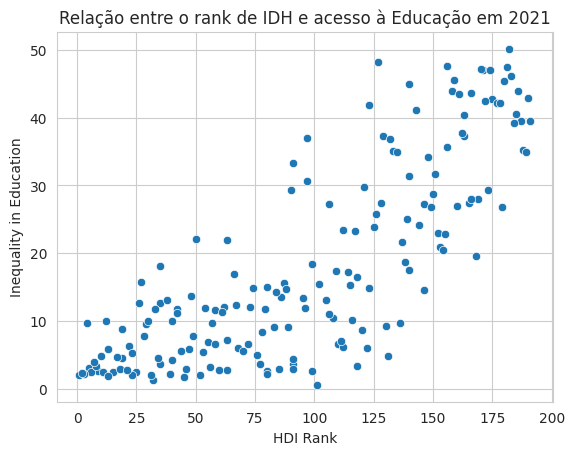

In [61]:
with sns.axes_style('whitegrid'):

  grafico = sns.scatterplot(x=education_final['HDI Rank (2021)'], y=education_final['Inequality in Education (2021)'])
  grafico.set(title='Relação entre o rank de IDH e acesso à Educação em 2021', xlabel='HDI Rank', ylabel='Inequality in Education');

Como visto no gráfico, a medida que a posição no rank é pior, a desigualdade na educação aumenta. Então, a uma relação de proporcionalidade que segue uma função de tipo (quadrática/logarítmica).